In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
eda = pd.read_csv('amz_uk_price_prediction_dataset.csv')
eda

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
category_crosstab = pd.crosstab(eda['category'], eda['isBestSeller'])
category_crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
best_seller = category_crosstab.div(category_crosstab.sum(axis=1),axis=0)
best_seller.sort_values(by=False, ascending=False)

isBestSeller,False,True
category,,
eBook Readers & Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000
Motorbike Seat Covers,1.000000,0.000000
Blank Media Cases & Wallets,1.000000,0.000000
Boxes & Organisers,1.000000,0.000000
...,...,...
Power & Hand Tools,0.964661,0.035339
Mobile Phone Accessories,0.957529,0.042471
Health & Personal Care,0.942314,0.057686


In [5]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(category_crosstab)
print(f'The Chi-square test statistic is: {chi2_statistic}')
print(f'The Chi-square test p-value is: {chi2_p_value}')

The Chi-square test statistic is: 36540.20270061387
The Chi-square test p-value is: 0.0


In [6]:
cramer_v = association(category_crosstab, method="cramer")
print(f'The Cramers V is : {cramer_v}')

The Cramers V is : 0.1222829439760564


<Axes: xlabel='category'>

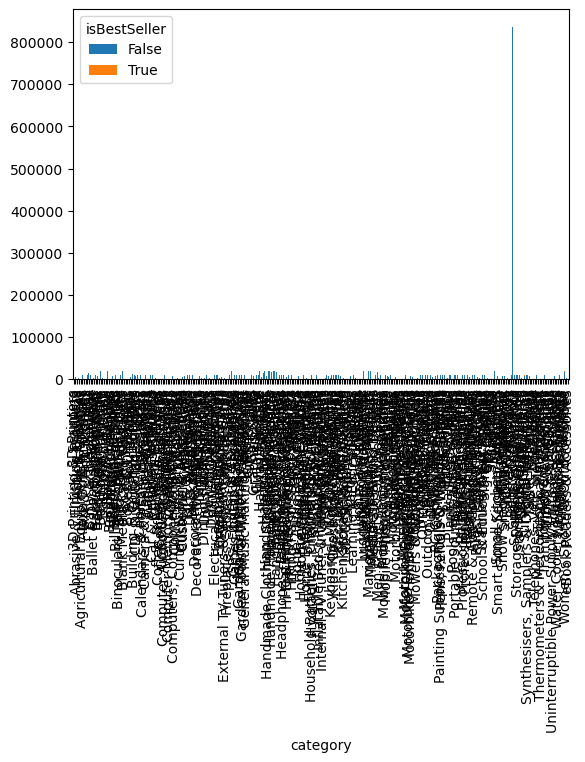

In [7]:
category_crosstab.plot(kind='bar', stacked=True)

In [8]:
Q1 = eda['price'].quantile(0.25)
Q3 = eda['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = eda['price'][(eda['price'] < lower_bound) | (eda['price'] > upper_bound)]
outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

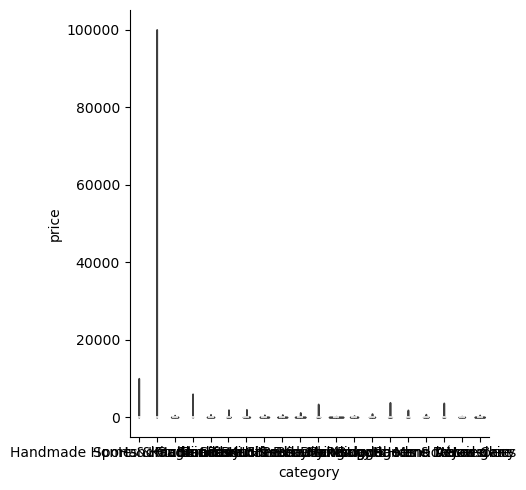

In [9]:
top_category = eda['category'].value_counts().head(20).index
df_category = eda[eda['category'].isin(top_category)]
sns.catplot(data=df_category, x='category', y="price",kind="violin")

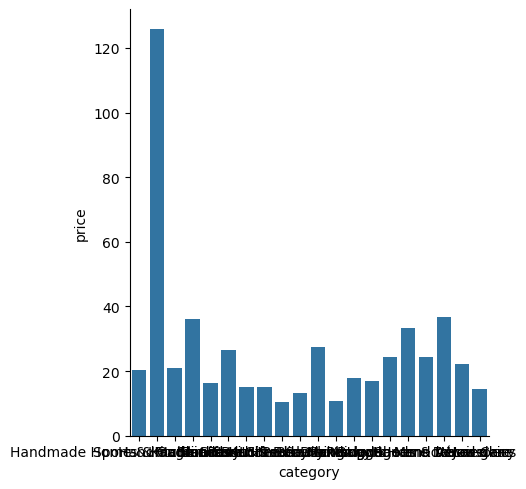

In [10]:
top_category = eda['category'].value_counts().head(20).index
df_category = eda[eda['category'].isin(top_category)]
sns.catplot(data=df_category, x='category', y="price", kind='bar', errorbar=None, estimator='mean')


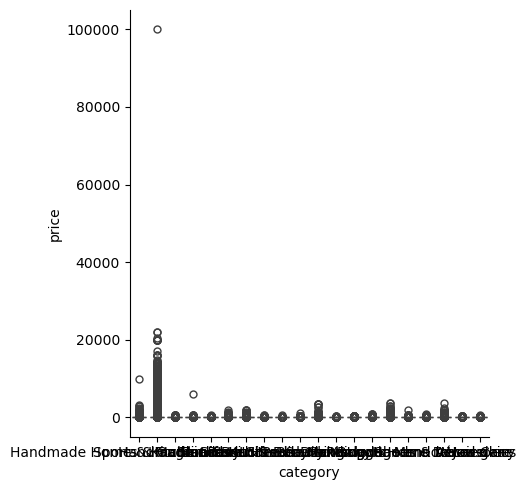

In [11]:
top_category = eda['category'].value_counts().head(20).index
df_category = eda[eda['category'].isin(top_category)]
sns.catplot(data=df_category, x='category', y="price",kind='box')

In [12]:
correlation_coefficient = eda['price'].corr(eda['stars'])
print(f'The correlation coefficient between price and stars is: {correlation_coefficient}')

The correlation coefficient between price and stars is: -0.12490673262148386


<Axes: xlabel='stars', ylabel='price'>

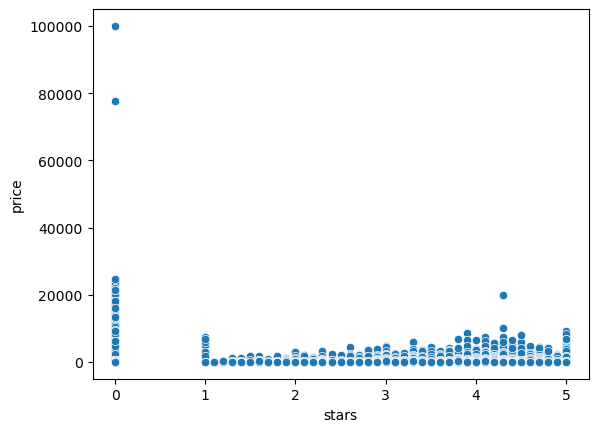

In [13]:
sns.scatterplot(data=eda, x='stars', y='price')

<Axes: >

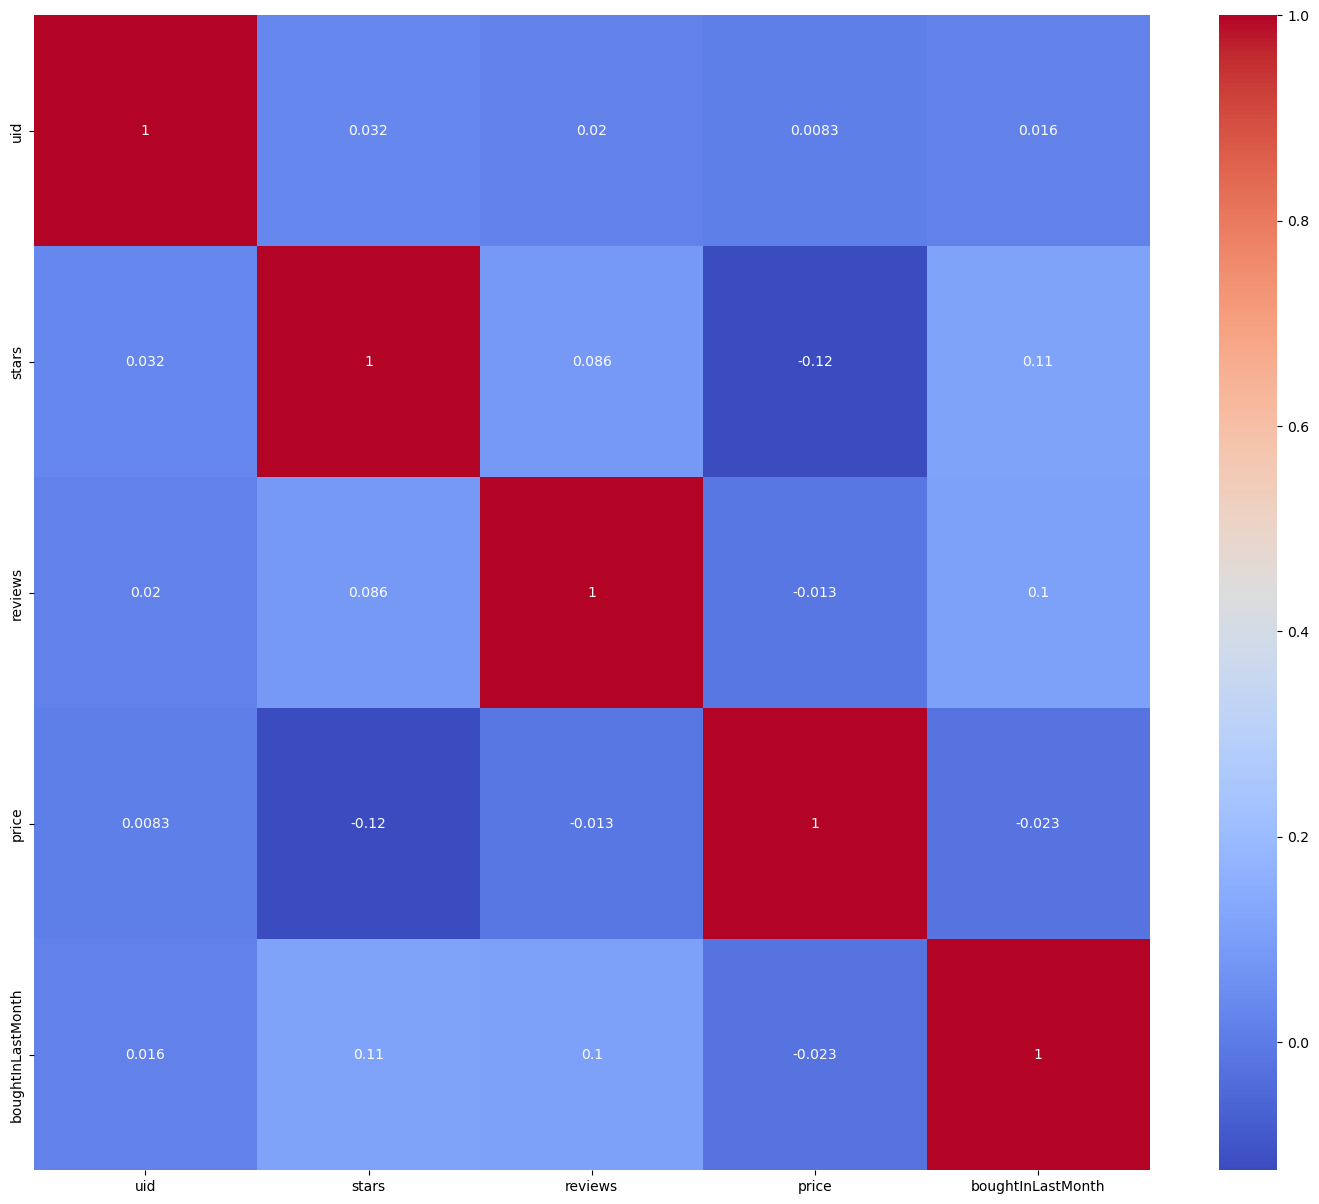

In [14]:
numeric_cols = eda.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

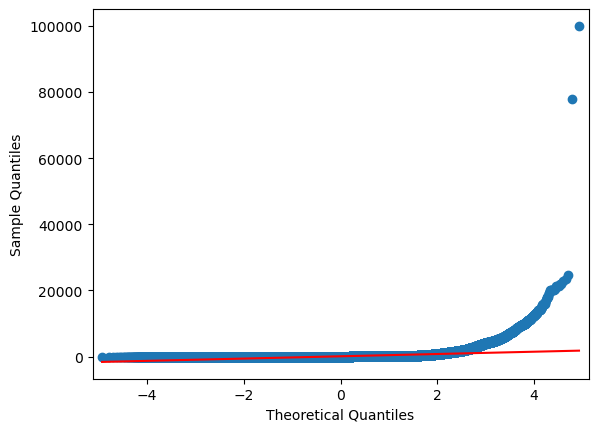

In [15]:
sm.qqplot(eda['price'],line='s');